## Project Index



1. **[Import packages And Data](#import_packages)**

    
2. **[Preprocessing](#Preprocessing)**

    * 2.1 **[Missing Values Treatment](#missing_values)**
    * 2.2 **[Unerstanding Variable Importance](#var_importance)**
    * 2.3 **[Outlier Treatment](#outlier_treatment)**
    * 2.4 **[Dimensionality Reduction with PCA](#pca)**
    
3. **[EDA](#eda)**


4. **[Model Building](#Model_Building)**
  
    * 4.1 **[Over Sampling for Balancing Dataset With SMOTE](#SMOTE)**
    * 4.2 **[Logistic Regression](#Logistic_Regression)**
    * 4.3 **[Random Forest](#Random_Forest)**
    * 4.4 **[KNN - K nearest Neighbour](#knn)**
    

5. **[Model Evaluation](#Model_Evaluation)**
    **[Model Building](#Model_Building)**


6. **[Conclusion](#Conclusion)**

<a id='import_packages'></a>
## Importing Data And Packages

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading Data
data = pd.read_csv('XYZCorp_LendingData.txt', sep = '\t', na_values = None)

C:\Users\HP\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(4)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


<a id='Preprocessing'></a>
## Preprocessing

<a id='missing_values'></a>
### Missing Values Treatment

In [5]:
# Checking For NAs Variables Having NA's
def get_na(data): 
    null_vars = data.isnull().sum()
    null_vars = null_vars[null_vars > 0]
    if(len(null_vars) > 0):
        null_vars.sort_values(inplace=True)
        print(str(null_vars/data.shape[0] * 100))
        null_vars.plot.bar(figsize=(15,4))
    else:
        print("No column have NA values")

title                           0.003855
last_credit_pull_d              0.005841
collections_12_mths_ex_med      0.006542
revol_util                      0.052105
last_pymnt_d                    1.035318
emp_length                      5.030673
emp_title                       5.776261
total_rev_hi_lim                7.863953
tot_cur_bal                     7.863953
tot_coll_amt                    7.863953
next_pymnt_d                   29.553757
mths_since_last_delinq         51.381767
mths_since_last_major_derog    75.099682
mths_since_last_record         84.674211
desc                           85.769111
inq_fi                         98.447607
all_util                       98.447607
max_bal_bc                     98.447607
open_rv_24m                    98.447607
open_rv_12m                    98.447607
total_bal_il                   98.447607
open_il_24m                    98.447607
open_il_12m                    98.447607
open_il_6m                     98.447607
open_acc_6m     

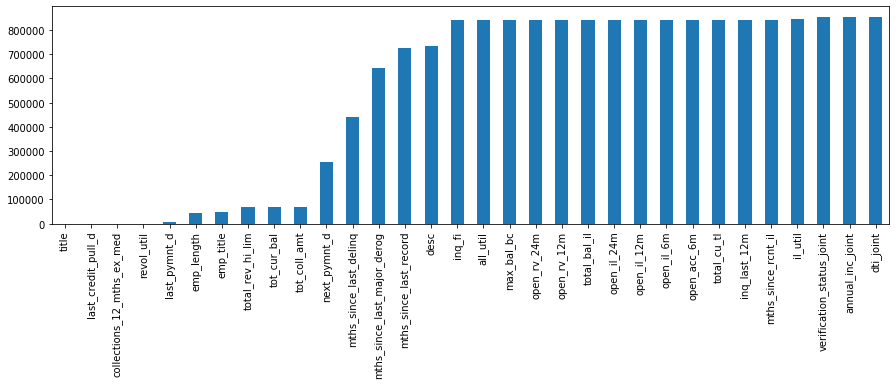

In [6]:
get_na(data)

In [7]:
## Removing Columns those are having more than 70% missing data
drop_columns_list = ['mths_since_last_major_derog', 'mths_since_last_record','desc', 'inq_fi','all_util','max_bal_bc',
                     'open_rv_24m','open_rv_12m','total_bal_il','open_il_24m','open_il_12m','open_il_6m','open_acc_6m',
                     'total_cu_tl','inq_last_12m','mths_since_rcnt_il','il_util','verification_status_joint',
                     'annual_inc_joint','dti_joint']

# Dropping Columns those having more than 70% NA Values
print('Before Dropping Shape of Data :{}'.format(data.shape))
data.drop(drop_columns_list, inplace = True, axis = 1)
print('After Dropping Shape of Data :{}'.format(data.shape))

Before Dropping Shape of Data :(855969, 73)
After Dropping Shape of Data :(855969, 53)


In [8]:
# Dropping ['id', 'member_id'] as it will not play important role into model building process.
print('Before Dropping Shape of Data :{}'.format(data.shape))
data.drop(['id', 'member_id'],inplace = True, axis = 1)
print('After Dropping Shape of Data :{}'.format(data.shape))

Before Dropping Shape of Data :(855969, 53)
After Dropping Shape of Data :(855969, 51)


In [9]:
# Feature List
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [10]:
# zip_code
data.zip_code.head()

0    860xx
1    309xx
2    606xx
3    917xx
4    972xx
Name: zip_code, dtype: object

In [11]:
# We are dropping zip_code as it can't be use into model building
data.drop('zip_code', inplace = True, axis = 1)

In [12]:
# Reviewing policy_code Column
data.policy_code.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: policy_code, dtype: float64

In [13]:
data.policy_code.value_counts()

1.0    855969
Name: policy_code, dtype: int64

In [14]:
# We are dropping policy_code as it only have one label for entire dataset that will lead to bias into model
data.drop('policy_code', inplace = True, axis = 1)

In [15]:
# emp_title - The job title supplied by the Borrower when applying for the loan.
data.emp_title.head()

0                         NaN
1                       Ryder
2                         NaN
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object

In [16]:
data.emp_title.value_counts()

Teacher                                     12965
Manager                                     10821
Registered Nurse                             5341
RN                                           5182
Owner                                        5157
Supervisor                                   4792
Sales                                        4051
Project Manager                              3856
Driver                                       3417
Office Manager                               3404
Director                                     3067
General Manager                              3060
manager                                      2994
teacher                                      2820
owner                                        2727
Engineer                                     2574
President                                    2478
driver                                       2319
Vice President                               2283
Attorney                                     2074


In [17]:
# Dropping emp_title as it is having 290912 lables and it will not impact on model.
data.drop('emp_title',inplace = True, axis = 1)

In [18]:
# Treatment for emp_length - Employment length in years.
data.emp_length.head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [19]:
data.emp_length = data.emp_length.str.replace(r'\D', '')
data.emp_length.head()

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: object

In [20]:
data.emp_length.isna().sum()

43061

In [21]:
data.emp_length.value_counts()

10    282090
1     122452
2      75986
3      67392
5      53812
4      50643
7      43204
8      42421
6      41446
9      33462
Name: emp_length, dtype: int64

In [22]:
# Filling NA values
data.emp_length.fillna(0, inplace = True)
# Change Datatype of variable to numeric as it is represanting no of years
data.emp_length = data.emp_length.astype('int32')
data.emp_length.dtype

dtype('int32')

In [23]:
# Treatment for term Variable - The number of payments on the loan. Values are in months and can be either 36 or 60.
data.term.head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [24]:
data.term.value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

In [25]:
# last_credit_pull_d - The most recent month XYZ corp. pulled credit for this loan
data.last_credit_pull_d.head()

0    Jan-2016
1    Sep-2013
2    Jan-2016
3    Jan-2015
4    Jan-2016
Name: last_credit_pull_d, dtype: object

In [26]:
# next_pymnt_d - Next scheduled payment date
data.next_pymnt_d.head()

0         NaN
1         NaN
2         NaN
3         NaN
4    Feb-2016
Name: next_pymnt_d, dtype: object

In [27]:
# earliest_cr_line - The month the borrower's earliest reported credit line was opened
data.earliest_cr_line.head()

0    Jan-1985
1    Apr-1999
2    Nov-2001
3    Feb-1996
4    Jan-1996
Name: earliest_cr_line, dtype: object

In [28]:
# Dropping Time Variables (Dates) from dataset
date_cols = ['last_credit_pull_d', 'next_pymnt_d', 'earliest_cr_line']
data.drop(date_cols,inplace = True, axis = 1)

In [29]:
# title - The loan title provided by the borrower
data.title.head()

0                Computer
1                    bike
2    real estate business
3                personel
4                Personal
Name: title, dtype: object

In [30]:
data.title.value_counts()

Debt consolidation                          398089
Credit card refinancing                     159228
Home improvement                             38633
Other                                        30522
Debt Consolidation                           15469
Major purchase                               11519
Medical expenses                              6408
Business                                      6325
Car financing                                 5372
Consolidation                                 5266
debt consolidation                            4718
Debt Consolidation Loan                       3744
Moving and relocation                         3724
Vacation                                      3640
Credit Card Consolidation                     2326
Home buying                                   2229
consolidation                                 2120
Personal Loan                                 2057
Consolidation Loan                            1743
Home Improvement               

In [31]:
data.drop('title', axis = 1, inplace = True)

In [32]:
# verification_status - Was the income source verified
data.verification_status.head()

0           Verified
1    Source Verified
2       Not Verified
3    Source Verified
4    Source Verified
Name: verification_status, dtype: object

In [33]:
# Mapping and Set Lable for 'Source Verified' to 'Verified'
data.verification_status = data.verification_status.map({'Verified': 'Verified', 'Source Verified': 'Verified','Not Verified':'Not Verified'})

In [34]:
# application_type - Indicates whether the loan is an individual application or a joint application with two co-borrowers
data.application_type.head()

0    INDIVIDUAL
1    INDIVIDUAL
2    INDIVIDUAL
3    INDIVIDUAL
4    INDIVIDUAL
Name: application_type, dtype: object

In [35]:
data.application_type.value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

In [36]:
# application_type is not having sufficient Joint Label cases so We can Drop it
data.drop('application_type', axis= 1, inplace = True)

In [37]:
# addr_state - The state provided by the borrower in the loan application
data.addr_state.head()

0    AZ
1    GA
2    IL
3    CA
4    OR
Name: addr_state, dtype: object

In [38]:
print('Total No of values for state : {}'.format(len(data.addr_state.value_counts())))

Total No of values for state : 51


In [39]:
# purpose - A category provided by the borrower for the loan request
data.purpose.head()

0       credit_card
1               car
2    small_business
3             other
4             other
Name: purpose, dtype: object

In [40]:
data.purpose.value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

In [41]:
data.purpose = data.purpose.map({'debt_consolidation': 'debt_consolidation','credit_card':'credit_card',
'home_improvement':'home_improvement', 'major_purchase':'Personal', 'small_business':'Personal', 'car':'Personal', 
'medical':'Personal','moving':'Personal','vacation':'Personal', 'house':'home_improvement', 'wedding':'Personal', 
'renewable_energy':'Personal', 'educational':'Personal'})

Here we add <b>'Personal'</b> class for all personal reason and club all together. And House is replaced with Home Improvement.

In [42]:
data.purpose.value_counts()

debt_consolidation    505392
credit_card           200144
Personal               56015
home_improvement       53469
Name: purpose, dtype: int64

In [43]:
data.purpose.fillna('Other', inplace = True)

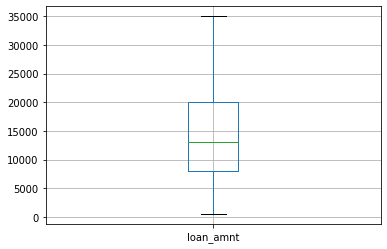

In [44]:
# loan_amnt - The listed amount of the loan applied for by the borrower.
data.boxplot(column ="loan_amnt")

In [45]:
# home_ownership - The home ownership status provided by the borrower during registratio
data.home_ownership.head()

0    RENT
1    RENT
2    RENT
3    RENT
4    RENT
Name: home_ownership, dtype: object

In [46]:
data.home_ownership.value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

In [47]:
# Replacing OTHER , NONE , ANY to Other for Reducing Columns while Dummy Coding
data.home_ownership = data.home_ownership.map({'MORTGAGE':'Mortgage', 'RENT': 'Rent', 'OWN':'Own', 'OTHER':'Other', 'NONE': 'Other','ANY':'Other' })

In [48]:
data.home_ownership.value_counts()

Mortgage    429106
Rent        342535
Own          84136
Other          192
Name: home_ownership, dtype: int64

In [49]:
# grade - Assigned loan grade
data.grade.head()

0    B
1    C
2    C
3    C
4    B
Name: grade, dtype: object

In [50]:
# sub_grade - Assigned loan sub_grade
data.sub_grade.head()

0    B2
1    C4
2    C5
3    C1
4    B5
Name: sub_grade, dtype: object

In [51]:
# Grade and Sub_grade are similar kind of factor. In this case Sub_grade can be better parameter to consider into model building process. So, we can remove Grade from dataset.
data.drop('grade',inplace = True, axis = 1)

In [52]:
# open_acc - The number of in the borrower's credit file.
data.open_acc.head()

0     3.0
1     3.0
2     2.0
3    10.0
4    15.0
Name: open_acc, dtype: float64

In [53]:
# Converting Datatype of open_acc as it is representing numbers
data.open_acc = data.open_acc.astype('int32')
data.open_acc.dtype

dtype('int32')

In [54]:
# delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
data.delinq_2yrs.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: delinq_2yrs, dtype: float64

In [55]:
# Here we are converting this feature into class variable based on occurances of delinquency.
data['delinq_2yrs'] = np.where((data['delinq_2yrs'] < 4), 'Low' , 'High')

In [56]:
# funded_amnt - The total amount committed to that loan at that point in time.
data.funded_amnt.head()

0     5000.0
1     2500.0
2     2400.0
3    10000.0
4     3000.0
Name: funded_amnt, dtype: float64

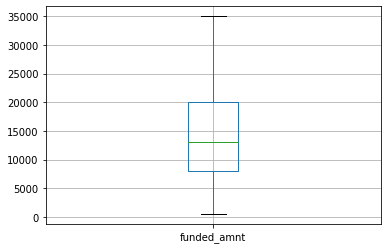

In [57]:
data.boxplot(column ="funded_amnt")

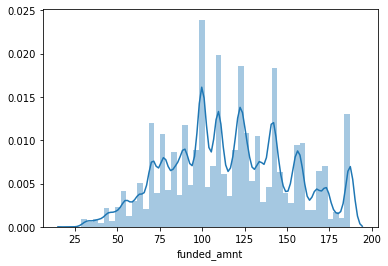

In [58]:
sns.distplot(np.sqrt(data.funded_amnt))

In [59]:
# funded_amnt_inv - The total amount committed by investors for that loan at that point in time.
data.funded_amnt_inv.head()

0     4975.0
1     2500.0
2     2400.0
3    10000.0
4     3000.0
Name: funded_amnt_inv, dtype: float64

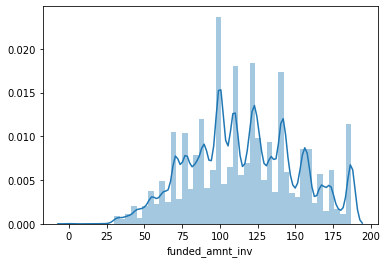

In [60]:
sns.distplot(np.sqrt(data.funded_amnt_inv))

In [61]:
# Checking Corelation with funded_amnt_inv and funded_amnt for avoid Multicolinearity
funced_df = pd.DataFrame(data.funded_amnt_inv, data.funded_amnt)
funced_df.corr()

,funded_amnt_inv
funded_amnt_inv,1.0


NOTE: As we can see funded_amnt_inv and funded_amnt is having perfect corelation so we can drop one of them.

In [62]:
data.drop('funded_amnt_inv', axis= 1, inplace = True)

In [63]:
# int_rate - Interest Rate on the loan
data.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [64]:
# installment - The monthly payment owed by the borrower if the loan originates.
data.installment.head()

0    162.87
1     59.83
2     84.33
3    339.31
4     67.79
Name: installment, dtype: float64

In [65]:
# annual_inc - The self-reported annual income provided by the borrower during registration.
data.annual_inc.head()

0    24000.0
1    30000.0
2    12252.0
3    49200.0
4    80000.0
Name: annual_inc, dtype: float64

In [66]:
# pymnt_plan - Indicates if a payment plan has been put in place for the loan
data.pymnt_plan.head()

0    n
1    n
2    n
3    n
4    n
Name: pymnt_plan, dtype: object

In [67]:
data.pymnt_plan.value_counts()

n    855964
y         5
Name: pymnt_plan, dtype: int64

In [68]:
# We can't consider pymnt_plan column as it is showing same value for almost all records
data.drop('pymnt_plan', axis = 1, inplace= True)

In [69]:
# dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, 
# excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.
data.dti.head()

0    27.65
1     1.00
2     8.72
3    20.00
4    17.94
Name: dti, dtype: float64

In [70]:
# pub_rec - Number of derogatory public records
data.pub_rec.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: pub_rec, dtype: float64

In [71]:
data.pub_rec.value_counts()

0.0     725455
1.0     108920
2.0      14250
3.0       4305
4.0       1496
5.0        728
6.0        366
7.0        167
8.0        110
9.0         46
10.0        41
11.0        21
12.0        14
13.0        12
15.0         6
18.0         5
16.0         5
21.0         4
17.0         3
14.0         2
19.0         2
49.0         2
40.0         1
26.0         1
63.0         1
22.0         1
28.0         1
86.0         1
34.0         1
23.0         1
54.0         1
Name: pub_rec, dtype: int64

In [72]:
#Feature Engineering for pub_rec. If Number of derogatory public records is less than 3 will go for good else go in fever of bad
data.pub_rec = np.where(data.pub_rec <= 2, 'Good', 'Bad')

In [73]:
# revol_bal - Total credit revolving balance
data.revol_bal.head()

0    13648.0
1     1687.0
2     2956.0
3     5598.0
4    27783.0
Name: revol_bal, dtype: float64

In [74]:
# revol_util - Revolving line utilization rate, or 
# the amount of credit the borrower is using relative to all available revolving credit.
data.revol_util.head()

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

In [75]:
data.revol_util.fillna(data.revol_util.mean(),inplace = True )

In [76]:
# total_acc - The total number of credit lines currently in the borrower's credit file
data.total_acc.head()

0     9.0
1     4.0
2    10.0
3    37.0
4    38.0
Name: total_acc, dtype: float64

In [77]:
# out_prncp - Remaining outstanding principal for total amount funded
data.out_prncp.head()

0      0.0
1      0.0
2      0.0
3      0.0
4    766.9
Name: out_prncp, dtype: float64

In [78]:
# out_prncp_inv - Remaining outstanding principal for portion of total amount funded by investors
data.out_prncp_inv.head()

0      0.0
1      0.0
2      0.0
3      0.0
4    766.9
Name: out_prncp_inv, dtype: float64

In [79]:
# Checking Corelation with out_prncp_inv and out_prncp for avoid Multicolinearity
out_prncp_df = pd.DataFrame(data.out_prncp_inv, data.out_prncp)
out_prncp_df.corr()

,out_prncp_inv
out_prncp_inv,1.0


NOTE: As we can see out_prncp_inv and out_prncp are perfectly corelated with eachother so we can drop out_prncp_inv form dataset to avoid multi-colinearity.

In [80]:
data.drop('out_prncp_inv', axis=1, inplace= True)

In [81]:
# total_pymnt - Payments received to date for total amount funded
data.total_pymnt.head()

0     5861.071414
1     1008.710000
2     3003.653644
3    12226.302212
4     3242.170000
Name: total_pymnt, dtype: float64

In [82]:
# total_pymnt_inv - Payments received to date for portion of total amount funded by investors
data.total_pymnt_inv.head()

0     5831.78
1     1008.71
2     3003.65
3    12226.30
4     3242.17
Name: total_pymnt_inv, dtype: float64

In [83]:
# Checking Corelation with total_pymnt_inv and total_pymnt for avoid Multicolinearity
out_prncp_df = pd.DataFrame(data.total_pymnt_inv, data.total_pymnt)
out_prncp_df.corr()

,total_pymnt_inv
total_pymnt_inv,1.0


NOTE: As we can see total_pymnt_inv and total_pymnt are perfectly corelated with eachother so we can drop out_prncp_inv form 
dataset to avoid multi-colinearity.

In [84]:
data.drop('total_pymnt_inv', axis=1, inplace= True)

In [85]:
# total_rec_prncp - Principal received to date
data.total_rec_prncp.head()

0     5000.00
1      456.46
2     2400.00
3    10000.00
4     2233.10
Name: total_rec_prncp, dtype: float64

In [86]:
# total_rec_int - Interest received to date
data.total_rec_int.head()

0     861.07
1     435.17
2     603.65
3    2209.33
4    1009.07
Name: total_rec_int, dtype: float64

In [87]:
# collection_recovery_fee - post charge off collection fee
data.collection_recovery_fee.head()

0    0.00
1    1.11
2    0.00
3    0.00
4    0.00
Name: collection_recovery_fee, dtype: float64

In [88]:
# recoveries - post charge off gross recovery
data.recoveries.head()

0      0.00
1    117.08
2      0.00
3      0.00
4      0.00
Name: recoveries, dtype: float64

In [89]:
# last_pymnt_d - Last month payment was received
data.last_pymnt_d.head()

0    Jan-2015
1    Apr-2013
2    Jun-2014
3    Jan-2015
4    Jan-2016
Name: last_pymnt_d, dtype: object

In [90]:
data.drop('last_pymnt_d', inplace = True, axis = 1)

In [91]:
# last_pymnt_amnt - Last total payment amount received
data.last_pymnt_amnt.head()

0    171.62
1    119.66
2    649.91
3    357.48
4     67.79
Name: last_pymnt_amnt, dtype: float64

In [92]:
# collections_12_mths_ex_med - Number of collections in 12 months excluding medical collections
data.collections_12_mths_ex_med.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: collections_12_mths_ex_med, dtype: float64

In [93]:
data.collections_12_mths_ex_med.fillna(round(data.collections_12_mths_ex_med.mean(),2), inplace = True)

In [94]:
# acc_now_delinq - The number of accounts on which the borrower is now delinquent.
data.acc_now_delinq.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: acc_now_delinq, dtype: float64

In [95]:
# tot_coll_amt - Total collection amounts ever owed
data.tot_coll_amt.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: tot_coll_amt, dtype: float64

In [96]:
data.tot_coll_amt.fillna(round(data.tot_coll_amt.mean(),2), inplace = True)

In [97]:
# tot_cur_bal - Total collection amounts ever owed
data.tot_cur_bal.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: tot_cur_bal, dtype: float64

In [98]:
data.tot_cur_bal.fillna(round(data.tot_cur_bal.mean(),2), inplace = True)

In [99]:
# total_rev_hi_lim - Total revolving high credit/credit limit
data.total_rev_hi_lim.tail()

855964    17100.0
855965    10200.0
855966    18000.0
855967    27000.0
855968    41700.0
Name: total_rev_hi_lim, dtype: float64

In [100]:
data.total_rev_hi_lim.fillna(round(data.total_rev_hi_lim.mean(),2), inplace = True)

In [101]:
# mths_since_last_delinq - The number of months since the borrower's last delinquency.
data.mths_since_last_delinq.head()

0     NaN
1     NaN
2     NaN
3    35.0
4    38.0
Name: mths_since_last_delinq, dtype: float64

In [102]:
data.mths_since_last_delinq.fillna(0,inplace= True)

In [103]:
get_na(data)

No column have NA values


In [104]:
# Sorting Data according to issue_d column
data.issue_d = pd.to_datetime(data.issue_d)
data = data.set_index(data.issue_d)
data = data.sort_index()

# Dropping issue_d as it is not required now
data.drop('issue_d', axis = 1, inplace = True)

In [105]:
data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
issue_d,,,,,,,,,,,,,,,,,,,,,
2007-06-01,7500.0,7500.0,36 months,13.75,255.43,E2,1,Own,22000.0,Not Verified,...,0.0,0.0,0.0,256.59,0.01,0.0,225.41,139766.25,32163.57,0
2007-07-01,5000.0,5000.0,36 months,7.43,155.38,A2,8,Mortgage,150000.0,Not Verified,...,0.0,0.0,0.0,4397.47,0.01,0.0,225.41,139766.25,32163.57,0
2007-07-01,5750.0,5750.0,36 months,7.43,178.69,A2,10,Mortgage,125000.0,Not Verified,...,0.0,0.0,0.0,4.74,0.01,0.0,225.41,139766.25,32163.57,0
2007-07-01,5000.0,5000.0,36 months,7.43,155.38,A2,6,Rent,40000.0,Not Verified,...,0.0,0.0,0.0,158.65,0.01,0.0,225.41,139766.25,32163.57,0
2007-07-01,1200.0,1200.0,36 months,11.54,39.60,C5,1,Rent,20000.0,Not Verified,...,0.0,0.0,0.0,39.45,0.01,0.0,225.41,139766.25,32163.57,0


In [106]:
data.shape

(855969, 36)

References:
* https://seaborn.pydata.org/
* https://seaborn.pydata.org/tutorial/categorical.html
* https://www.kaggle.com/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way
* https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
* https://medium.com/@purnasaigudikandula/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751

<a id='outlier_treatment'></a>
### Outlier Treatment

In [107]:
# Upper Caping and Lower Caping for numerical Feature

def set_caping(column, capping):
   
    mean = data[column].mean() # Mean of the column
    std = data[column].std() # Standard Deviation of the column
   
    UCL = mean + 3 * std
    LCL = mean - 3 * std
    if capping == "both":
        data[column] = np.where((data[column] > UCL), UCL , data[column])
        data[column] = np.where((data[column] < UCL), LCL , data[column])
       
    elif capping == "upper":
        data[column] = np.where((data[column] > UCL), UCL , data[column])
       
    elif capping == "lower":
        data[column] = np.where((data[column] < UCL), LCL ,data[column])
    else:
        print("Please enter proper value of capping parameter. \n Possible values:\tboth\tupper\tlower")


# set_caping("age", capping = "both")
# data.boxplot(column = "age")

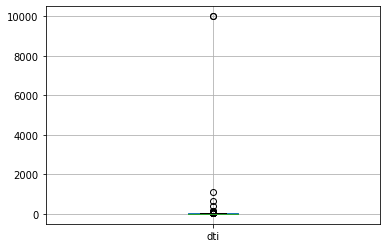

In [108]:
data.boxplot(column ="dti")

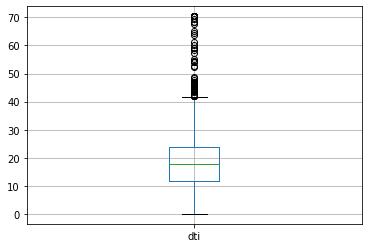

In [109]:
set_caping("dti", capping = "upper")
data.boxplot(column ="dti")

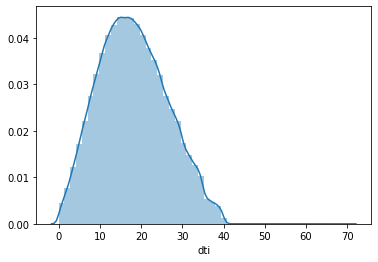

In [110]:
sns.distplot(data.dti)

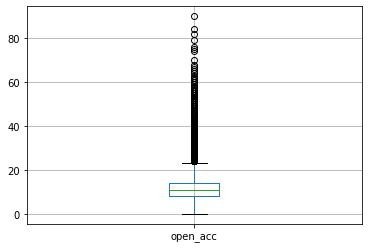

In [111]:
data.boxplot(column ="open_acc")

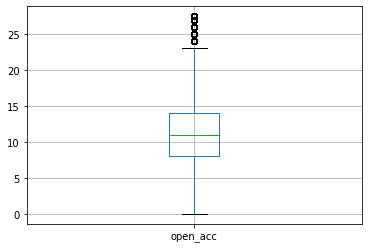

In [112]:
set_caping("open_acc", capping = "upper")
data.boxplot(column ="open_acc")

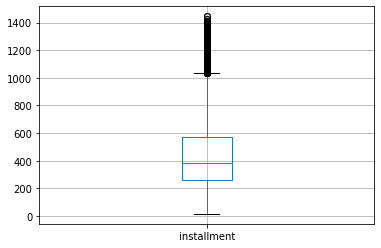

In [113]:
data.boxplot(column ="installment")

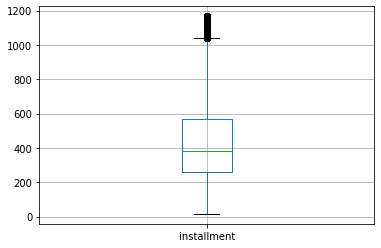

In [114]:
set_caping("installment", capping = "upper")
data.boxplot(column ="installment")

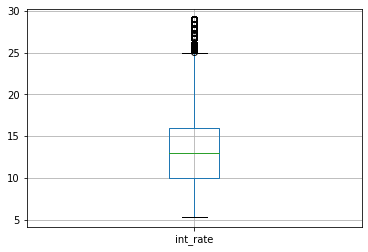

In [115]:
data.boxplot(column ="int_rate")

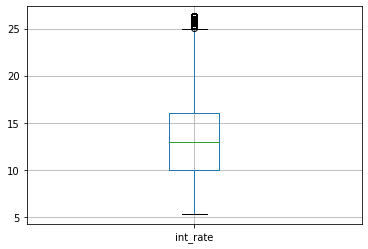

In [116]:
set_caping("int_rate", capping = "upper")
data.boxplot(column ="int_rate")

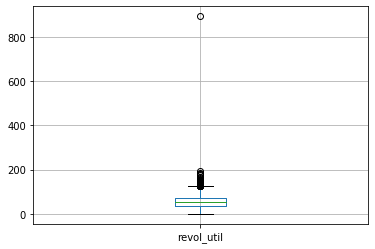

In [117]:
data.boxplot(column ="revol_util")

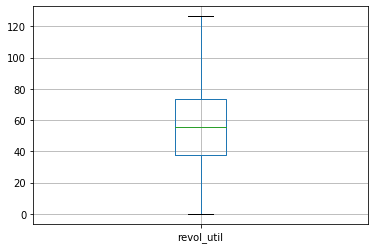

In [118]:
set_caping("revol_util", capping = "upper")
data.boxplot(column ="revol_util")

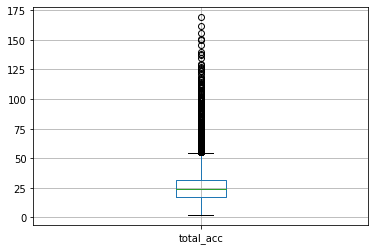

In [119]:
data.boxplot(column ="total_acc")

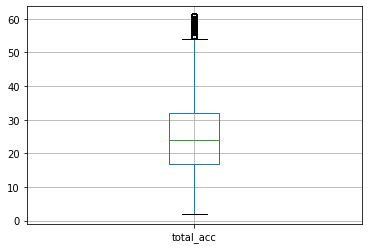

In [120]:
set_caping("total_acc", capping = "upper")
data.boxplot(column ="total_acc")

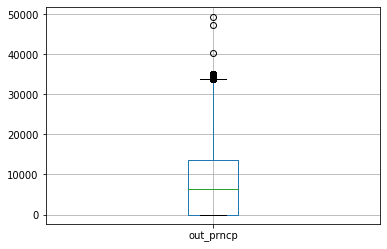

In [121]:
data.boxplot(column ="out_prncp")

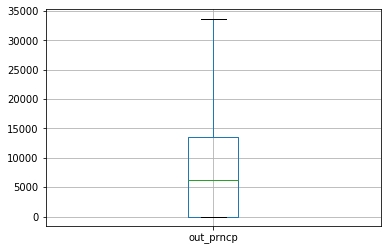

In [122]:
set_caping("out_prncp", capping = "upper")
data.boxplot(column ="out_prncp")

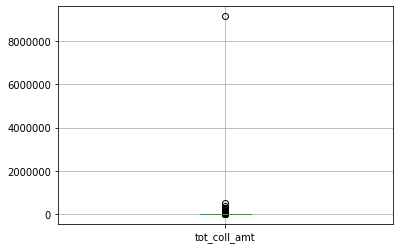

In [123]:
data.boxplot(column ="tot_coll_amt")

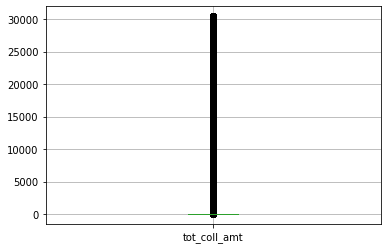

In [124]:
set_caping("tot_coll_amt", capping = "upper")
data.boxplot(column ="tot_coll_amt")

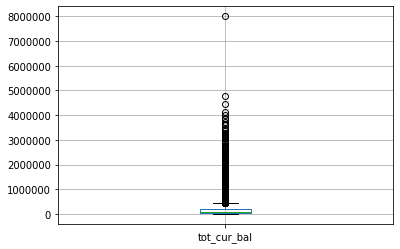

In [125]:
data.boxplot(column ="tot_cur_bal")

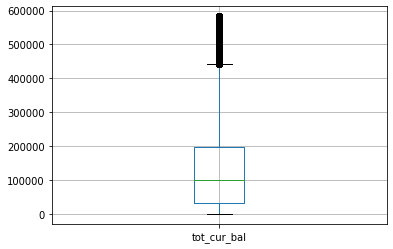

In [126]:
set_caping("tot_cur_bal", capping = "upper")
data.boxplot(column ="tot_cur_bal")

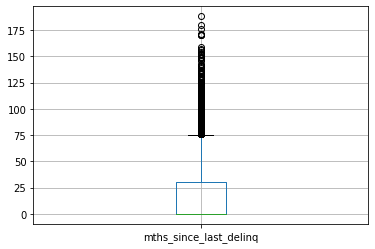

In [127]:
data.boxplot(column ="mths_since_last_delinq")

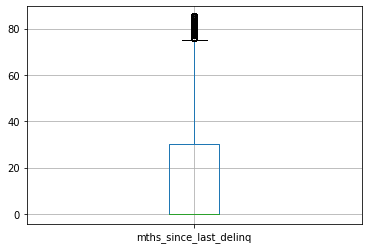

In [128]:
set_caping("mths_since_last_delinq", capping = "upper")
data.boxplot(column ="mths_since_last_delinq")

In [129]:
data.to_csv('dataset/ref_data.csv')

<a id='eda'></a>
## EDA - Exploratory Data Analysis

In [140]:
data = pd.read_csv('dataset/ref_data.csv')

In [130]:
# Devide Categorical And Numerical Data
cat_data = data.select_dtypes('O')
num_data = data.drop(cat_data, axis=1)

In [131]:
cat_data.head()

,term,sub_grade,home_ownership,verification_status,purpose,addr_state,delinq_2yrs,pub_rec,initial_list_status
issue_d,,,,,,,,,
2007-06-01,36 months,E2,Own,Not Verified,debt_consolidation,MA,Low,Good,f
2007-07-01,36 months,A2,Mortgage,Not Verified,home_improvement,GA,Low,Good,f
2007-07-01,36 months,A2,Mortgage,Not Verified,debt_consolidation,MA,Low,Good,f
2007-07-01,36 months,A2,Rent,Not Verified,Personal,WI,Low,Good,f
2007-07-01,36 months,C5,Rent,Not Verified,credit_card,ME,Low,Good,f


In [132]:
num_data.head()

,loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,mths_since_last_delinq,open_acc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
issue_d,,,,,,,,,,,,,,,,,,,,,
2007-06-01,7500.0,7500.0,13.75,255.43,1,22000.0,14.29,0.0,11.0,7.0,...,0.0,0.0,0.0,256.59,0.01,0.0,225.41,139766.25,32163.57,0
2007-07-01,5000.0,5000.0,7.43,155.38,8,150000.0,0.00,0.0,0.0,2.0,...,0.0,0.0,0.0,4397.47,0.01,0.0,225.41,139766.25,32163.57,0
2007-07-01,5750.0,5750.0,7.43,178.69,10,125000.0,0.27,0.0,0.0,10.0,...,0.0,0.0,0.0,4.74,0.01,0.0,225.41,139766.25,32163.57,0
2007-07-01,5000.0,5000.0,7.43,155.38,6,40000.0,2.55,2.0,0.0,4.0,...,0.0,0.0,0.0,158.65,0.01,0.0,225.41,139766.25,32163.57,0
2007-07-01,1200.0,1200.0,11.54,39.60,1,20000.0,2.04,2.0,24.0,3.0,...,0.0,0.0,0.0,39.45,0.01,0.0,225.41,139766.25,32163.57,0


#### EDA for Categorical Variables

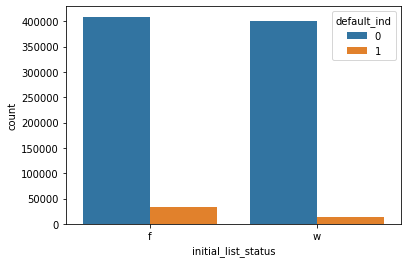

In [133]:
sns.countplot(data = data, x = 'initial_list_status', hue="default_ind")

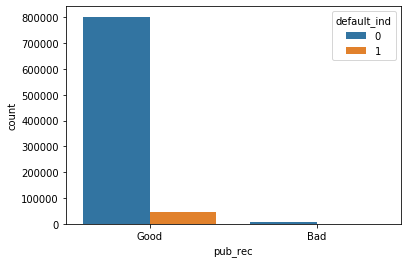

In [134]:
sns.countplot(data = data, x = 'pub_rec', hue="default_ind")

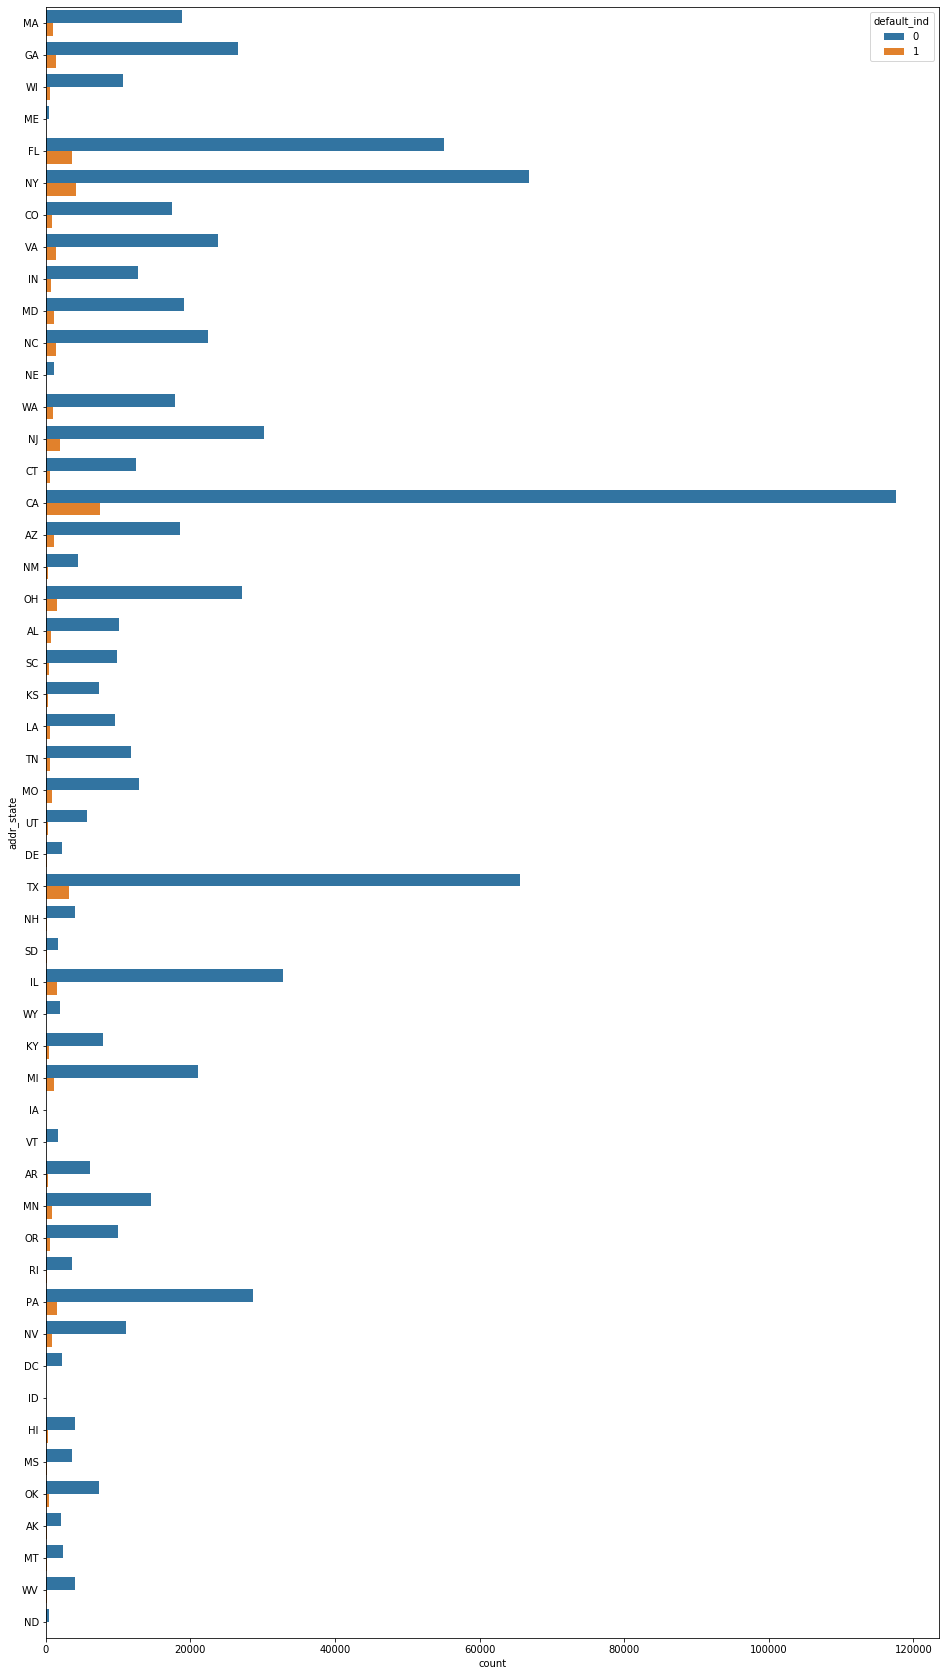

In [135]:
plt.figure(figsize=(16,30))
sns.countplot(data = data, y = 'addr_state', hue="default_ind")

In [136]:
# We can Drop addr_state columns as it is not significant.
data.drop('addr_state', axis = 1 , inplace = True)

<Figure size 1008x576 with 0 Axes>

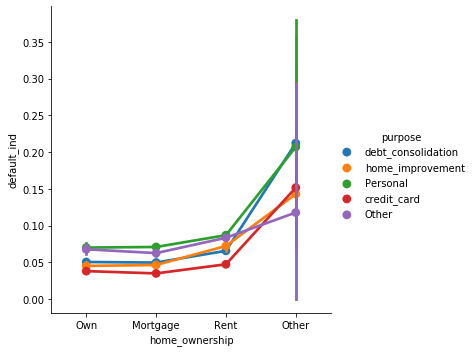

In [137]:
plt.figure(figsize=(14,8))
sns.catplot(x="home_ownership", y="default_ind", hue="purpose", kind="point", data=data)

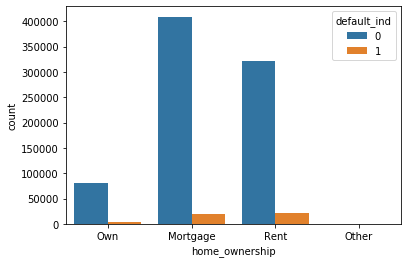

In [138]:
sns.countplot(data = data, x = 'home_ownership', hue="default_ind")

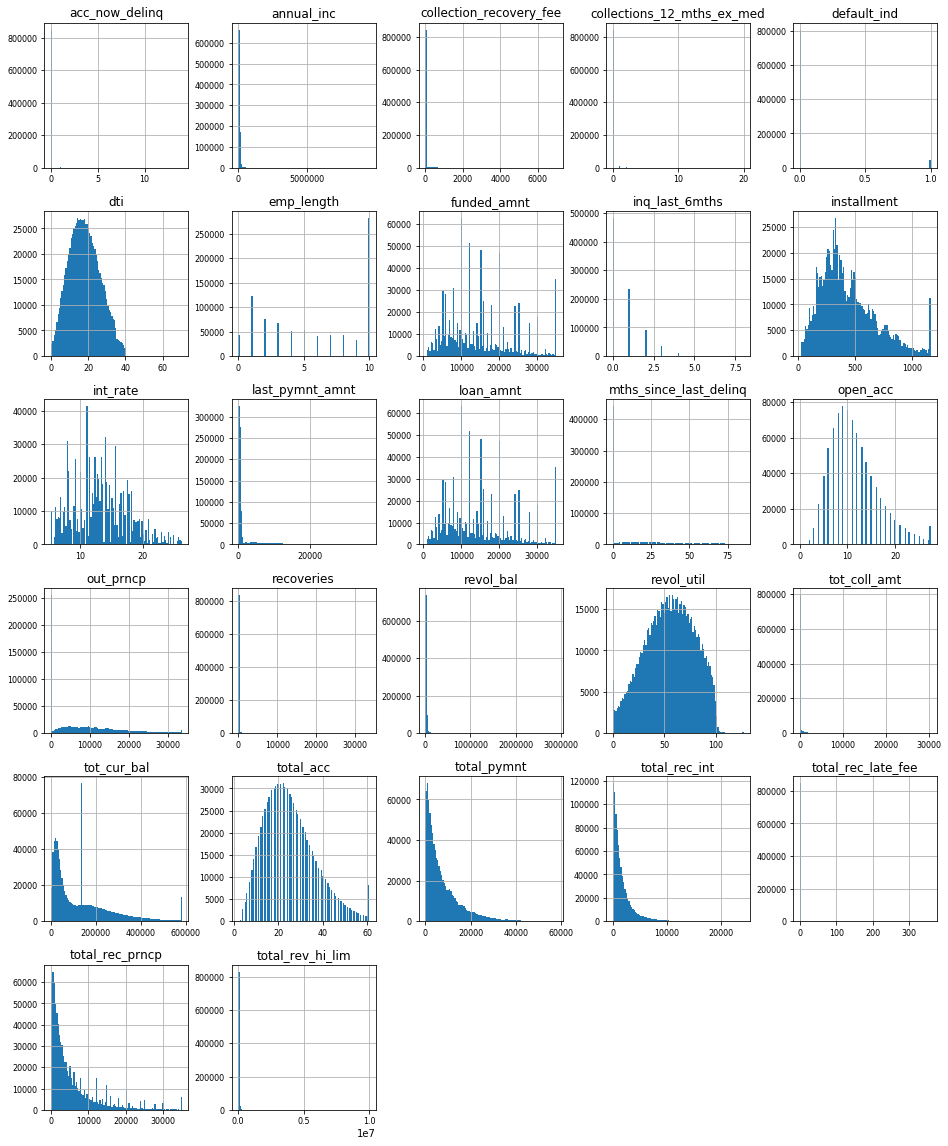

In [139]:
# Checking Skewness
num_data.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8);

### References:
* https://seaborn.pydata.org/
* https://seaborn.pydata.org/tutorial/categorical.html
* https://www.kaggle.com/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way
* https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
* https://medium.com/@purnasaigudikandula/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751

<a id='pca'></a>
### Dimensionality Reduction For Numerical Data with PCA

<a id='Model_Building'></a>
## Model Building

<a id='SMOTE'></a>
### Over Sampling for Balancing Dataset With SMOTE - Synthetic Minority Oversampling Technique

<a id='Logistic_Regression'></a>
## Logistic Regression

<a id='Random_Forest'></a>
## Random Forest

<a id='knn'></a>
## KNN - K nearest Neighbour

<a id='Model_Evaluation'></a>
## Model Evaluation

<a id='Conclusion'></a>
## Conclusion